In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models

print(tf.__version__)

2.6.0


In [2]:
ip_data = np.load("../data/1988_lanina_ip.npy")

In [3]:
model = keras.models.load_model("../data/model/exp1_pretrain_op1_2")

In [4]:
model.predict(ip_data)

array([[-1.3760775]], dtype=float32)

In [7]:
model.layers[-1].get_weights()[0]

array([[-0.40977156],
       [-0.15387367],
       [ 0.08207798],
       [ 0.03053278],
       [ 0.03291466],
       [-0.09390629],
       [ 0.19825979],
       [-0.00085979],
       [-0.00111334],
       [-0.04646878],
       [-0.04849915],
       [-0.03644871],
       [ 0.21849759],
       [ 0.255392  ],
       [-0.16839173],
       [ 0.14109258],
       [ 0.4395202 ],
       [ 0.12562749],
       [-0.19184175],
       [ 0.178934  ],
       [-0.10752026],
       [-0.4166408 ],
       [-0.01981817],
       [-0.2252452 ],
       [ 0.09864096],
       [ 0.39955297],
       [-0.29474655],
       [-0.11463488],
       [ 0.21463177],
       [-0.19449896]], dtype=float32)

In [8]:
last_conv_layer_name = "conv2d_2"
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
)

In [10]:
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(ip_data)
    class_channel = preds[:, 0]
grads = tape.gradient(class_channel, last_conv_layer_output)
grads.shape

TensorShape([1, 6, 18, 50])

In [11]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
pooled_grads

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 2.0448503e-03, -3.4824770e-03, -1.2714398e-03,  4.4760858e-03,
       -3.8570623e-05, -3.5271705e-03, -3.2330884e-03, -1.9473337e-03,
        2.1241230e-03, -1.3347390e-03, -2.0740037e-03,  2.3059547e-06,
       -4.2803790e-03,  1.4413907e-05, -1.1348238e-03,  1.9372831e-03,
       -1.2576514e-03, -2.2965972e-03,  3.1142179e-03,  1.5556738e-03,
        5.3568551e-04, -2.5968184e-03, -1.1218066e-03, -1.6680429e-03,
        2.9142883e-03,  1.5696370e-03,  1.8152411e-03,  9.4721164e-04,
        1.4891826e-03, -3.4882904e-03,  2.5607164e-03, -1.3603797e-03,
        3.1266788e-03,  4.4288007e-03,  2.8831924e-03, -3.3071649e-04,
        1.3483772e-03, -4.2001721e-03, -8.8951748e-04,  1.6098737e-03,
        2.2198411e-03,  1.6372164e-03,  1.9200116e-03,  2.6397366e-04,
       -7.1842695e-04, -1.4656618e-03,  2.5704016e-03,  4.8692551e-04,
       -1.4665736e-03,  4.1782591e-03], dtype=float32)>

In [12]:
last_conv_layer_output = last_conv_layer_output[0]

In [13]:
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]

In [14]:
heatmap

<tf.Tensor: shape=(6, 18, 1), dtype=float32, numpy=
array([[[ 2.47606472e-03],
        [ 1.69009564e-03],
        [ 3.54692549e-03],
        [-1.55566388e-03],
        [-2.23042164e-03],
        [ 2.35093152e-03],
        [ 7.78915710e-04],
        [ 3.18586687e-03],
        [ 6.87251939e-03],
        [ 9.07693524e-04],
        [-1.23523932e-03],
        [ 1.75774295e-03],
        [-1.39547861e-03],
        [-7.69722974e-04],
        [ 7.92387174e-04],
        [ 1.08976918e-03],
        [ 2.89358664e-04],
        [ 2.63562100e-03]],

       [[ 3.60022788e-03],
        [ 6.58028480e-03],
        [ 3.98535887e-03],
        [ 1.43539452e-04],
        [ 6.17054570e-03],
        [ 4.96228226e-03],
        [ 2.41618417e-03],
        [-5.27309533e-03],
        [-1.92475549e-04],
        [-2.58792122e-03],
        [-6.87238853e-03],
        [-1.08919740e-02],
        [-8.57065246e-03],
        [-5.98861836e-03],
        [-4.34675952e-03],
        [-4.00406425e-05],
        [ 1.29550649e-03],
 

In [15]:
heatmap = tf.squeeze(heatmap)
heatmap

<tf.Tensor: shape=(6, 18), dtype=float32, numpy=
array([[ 2.47606472e-03,  1.69009564e-03,  3.54692549e-03,
        -1.55566388e-03, -2.23042164e-03,  2.35093152e-03,
         7.78915710e-04,  3.18586687e-03,  6.87251939e-03,
         9.07693524e-04, -1.23523932e-03,  1.75774295e-03,
        -1.39547861e-03, -7.69722974e-04,  7.92387174e-04,
         1.08976918e-03,  2.89358664e-04,  2.63562100e-03],
       [ 3.60022788e-03,  6.58028480e-03,  3.98535887e-03,
         1.43539452e-04,  6.17054570e-03,  4.96228226e-03,
         2.41618417e-03, -5.27309533e-03, -1.92475549e-04,
        -2.58792122e-03, -6.87238853e-03, -1.08919740e-02,
        -8.57065246e-03, -5.98861836e-03, -4.34675952e-03,
        -4.00406425e-05,  1.29550649e-03,  5.96406753e-04],
       [-4.38493397e-03,  1.65848865e-03, -1.45725498e-03,
         7.57807691e-04,  9.29491501e-03, -2.28610792e-04,
        -7.82955997e-03, -4.01554425e-05, -2.19293777e-03,
        -7.08168000e-03, -3.60571640e-03, -9.27077513e-03,
     

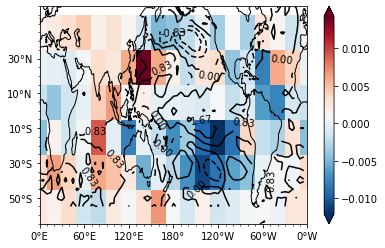

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

x = np.arange(0, 356, 5)[::4]
y = np.arange(-55, 61, 5)[::4]
x1 = np.arange(0, 356, 5)
y1 = np.arange(-55, 61, 5)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
draw_s = np.copy(ip_data[0, :, :, 1])
draw_s[draw_s == 0] = np.NAN

plt.pcolormesh(x, y, heatmap, cmap="RdBu_r", transform=ccrs.PlateCarree())
m = ax.contour(x1, y1, draw_s, transform=ccrs.PlateCarree(), levels=np.linspace(-5, 5, 13), colors='k')
xtk = np.arange(-180, 181, 60)
ax.set_xticks(xtk)
ax.clabel(m, fmt="%.2f")
plt.colorbar(extend="both")
ax.set_aspect("auto")
ax.set_yticks(np.arange(-50, 50, 20), crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()

In [51]:
x = np.arange(0, 356, 5)[::4]
y = np.arange(-55, 61, 5)[::4]
x.shape, y.shape

((18,), (6,))

In [70]:
np.save("../data/heatmap_1_res", heatmap)

In [32]:
np.nanmax(draw_s), np.nanmin(draw_s)

(14.255504, -547.73895)